<a href="https://colab.research.google.com/github/Sudarshan-CSE/VOIS_AICTE-MAJOR-PROJECT-Sudarshan-Khot/blob/main/Netflix_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Netflix Dataset.csv")

In [ ]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1-Jan-20,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape


(7789, 11)

In [ ]:
df.columns.tolist()

['Show_Id',
 'Category',
 'Title',
 'Director',
 'Cast',
 'Country',
 'Release_Date',
 'Rating',
 'Duration',
 'Type',
 'Description']

In [ ]:
df.isnull().sum()

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


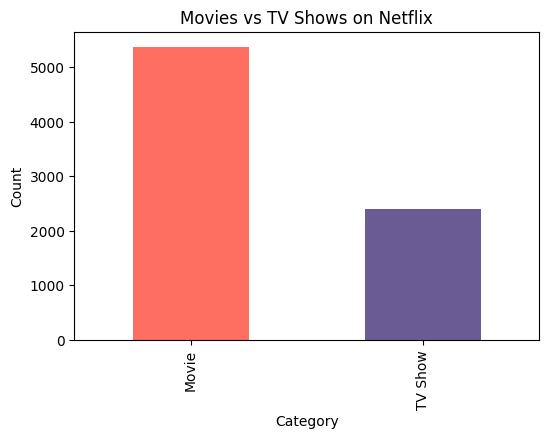

In [ ]:
plt.figure(figsize=(6,4))
df['Category'].value_counts().plot(kind='bar', color=['#FF6F61','#6B5B95'])
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

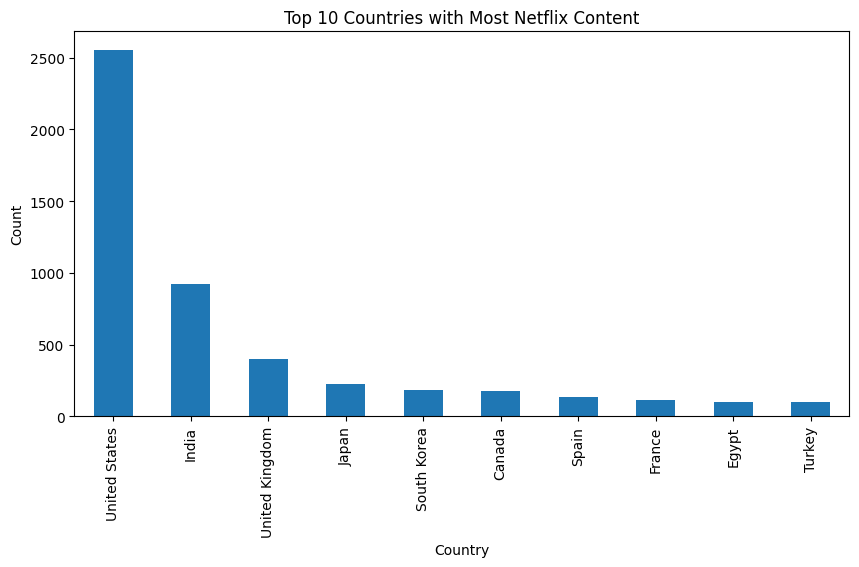

In [ ]:
plt.figure(figsize=(10,5))
df['Country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

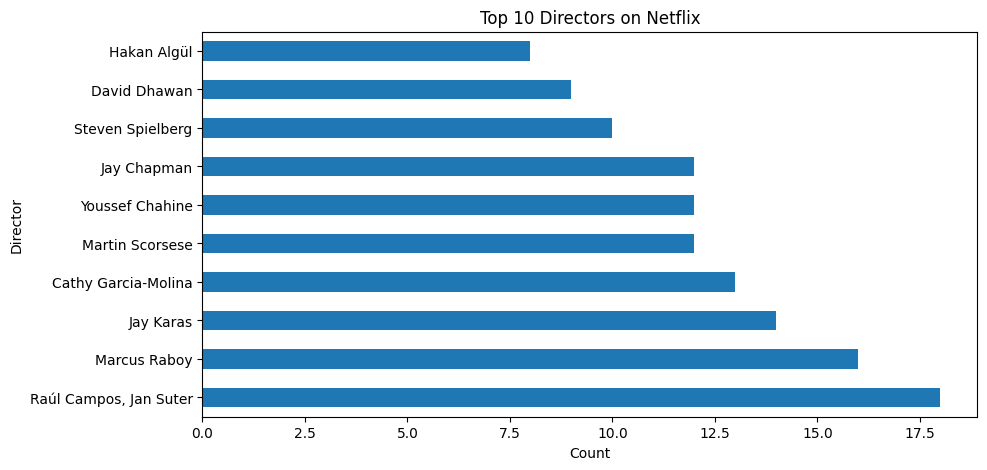

In [ ]:
plt.figure(figsize=(10,5))
df['Director'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()


In [ ]:
from collections import Counter

actors = df['Cast'].dropna().str.split(', ')
actor_list = [actor for sublist in actors for actor in sublist]
top_actors = Counter(actor_list).most_common(10)


In [ ]:
actors_df = pd.DataFrame(top_actors, columns=['Actor', 'Appearances'])

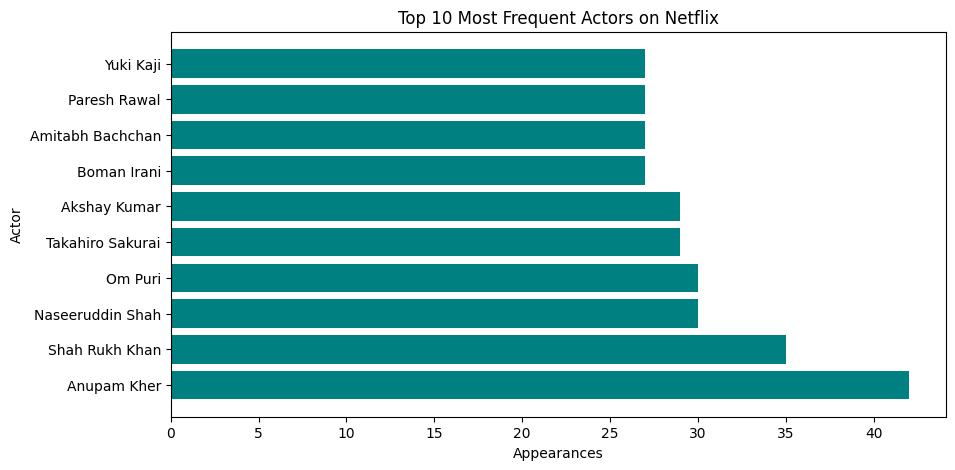

In [ ]:
plt.figure(figsize=(10,5))
plt.barh(actors_df['Actor'], actors_df['Appearances'], color='teal')
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Appearances")
plt.ylabel("Actor")
plt.show()

/tmp/ipython-input-3730682227.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year


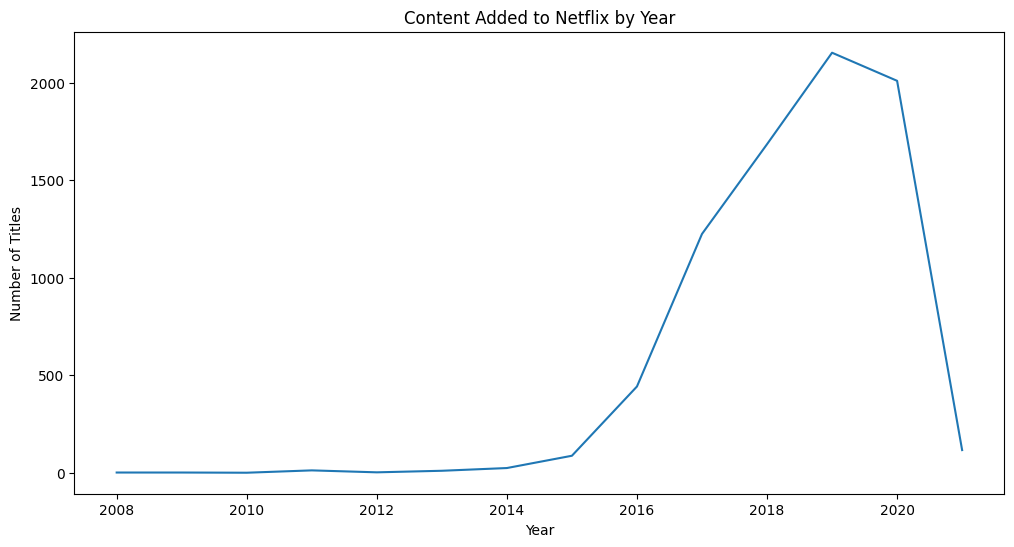

In [ ]:
df['Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year
df['Year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title("Content Added to Netflix by Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

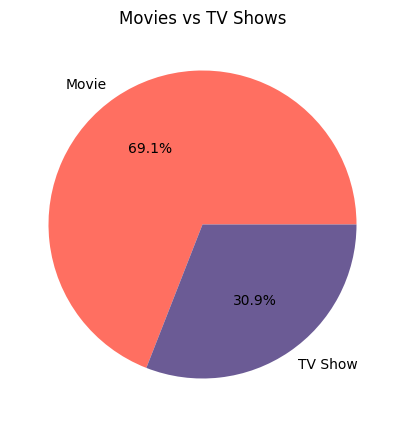

/tmp/ipython-input-3678727267.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[g[1] for g in genre_count], y=[g[0] for g in genre_count], palette="viridis")


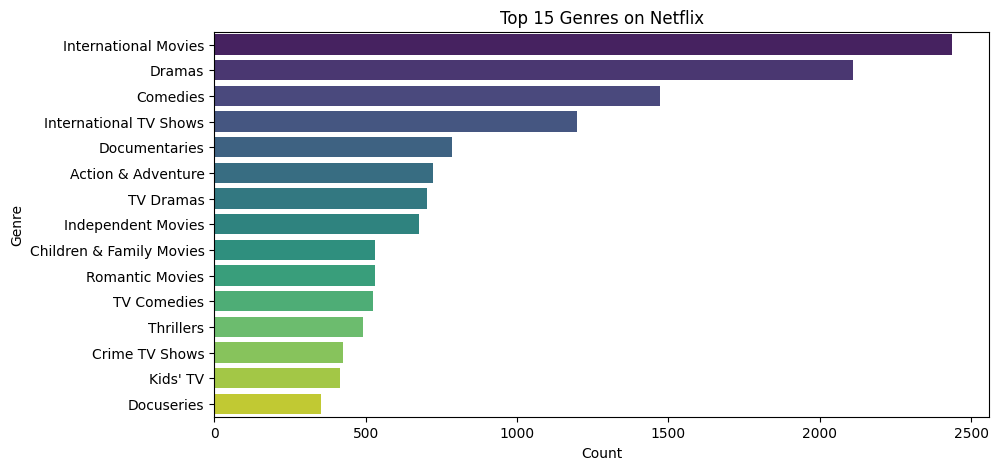

/tmp/ipython-input-3678727267.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Minutes'] = movie_df['Duration'].str.replace(" min","", regex=False)
/tmp/ipython-input-3678727267.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['Minutes'] = pd.to_numeric(movie_df['Minutes'], errors='coerce')


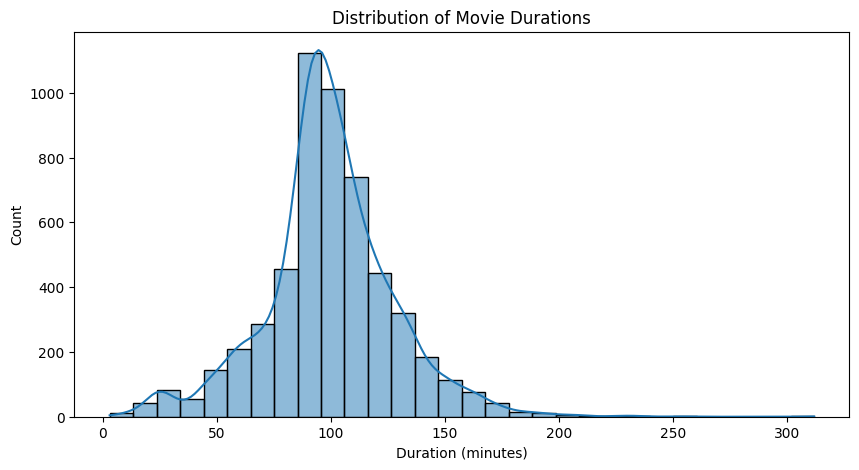

/tmp/ipython-input-3678727267.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['Seasons'] = tv_df['Duration'].str.replace(" Season","", regex=False).str.replace("s","", regex=False)
/tmp/ipython-input-3678727267.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['Seasons'] = pd.to_numeric(tv_df['Seasons'], errors='coerce')
/tmp/ipython-input-3678727267.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

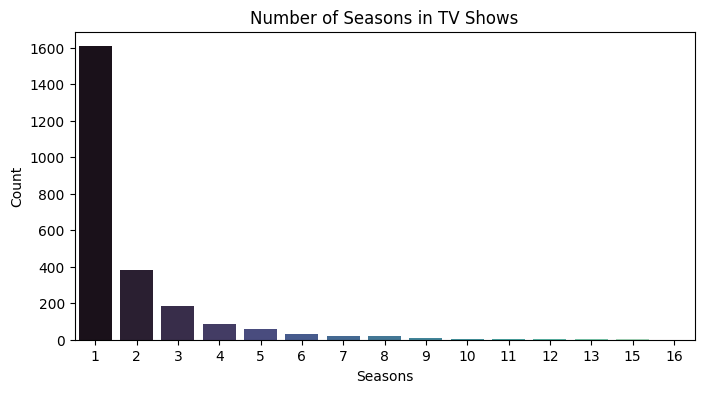

/tmp/ipython-input-3678727267.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Rating'], order=df['Rating'].value_counts().index, palette="coolwarm")


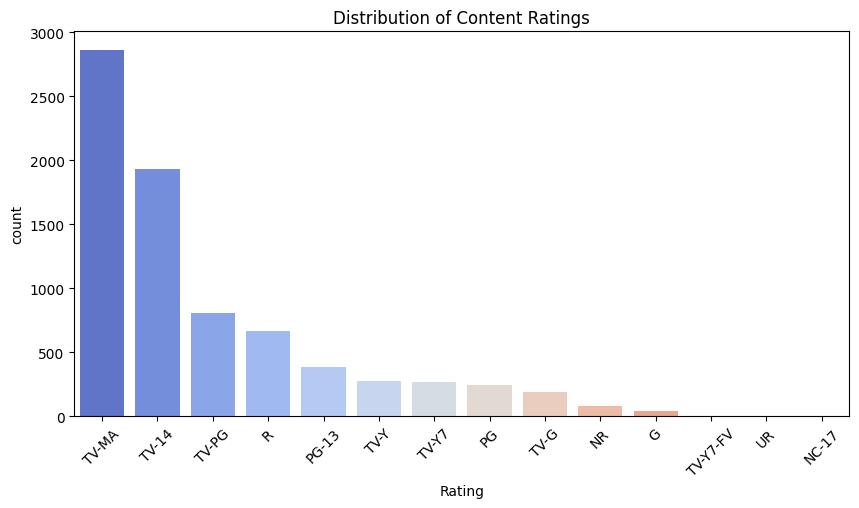

/tmp/ipython-input-3678727267.py:60: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year


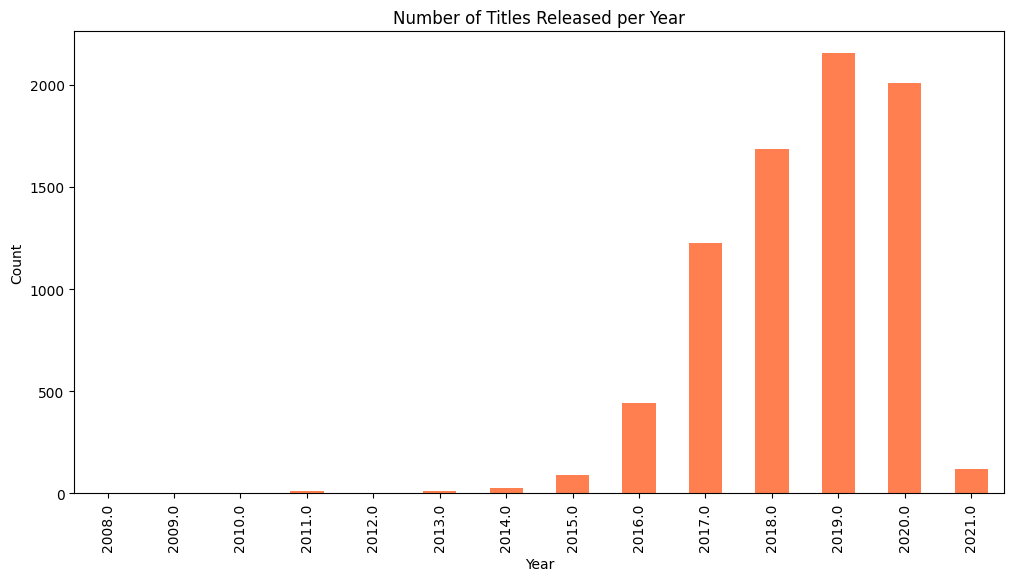

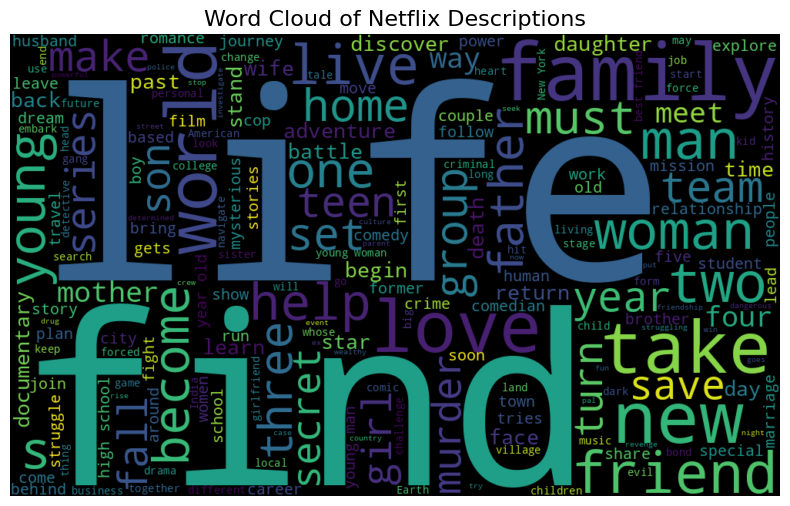

In [ ]:
# =========================================
# Extended EDA on Netflix Dataset
# =========================================

import seaborn as sns
from wordcloud import WordCloud

# 1. Movies vs TV Shows (Pie Chart)
plt.figure(figsize=(5,5))
df['Category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#FF6F61','#6B5B95'])
plt.title("Movies vs TV Shows")
plt.ylabel("")
plt.show()

# 2. Genre Frequency (Top 15)
from collections import Counter
genres = df['Type'].dropna().str.split(', ')
genre_list = [g for sublist in genres for g in sublist]
genre_count = Counter(genre_list).most_common(15)

plt.figure(figsize=(10,5))
sns.barplot(x=[g[1] for g in genre_count], y=[g[0] for g in genre_count], palette="viridis")
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# 3. Movie Duration Distribution
movie_df = df[df['Category']=="Movie"]
movie_df['Minutes'] = movie_df['Duration'].str.replace(" min","", regex=False)
movie_df['Minutes'] = pd.to_numeric(movie_df['Minutes'], errors='coerce')

plt.figure(figsize=(10,5))
sns.histplot(movie_df['Minutes'].dropna(), bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

# 4. TV Show Seasons Distribution
tv_df = df[df['Category']=="TV Show"]
tv_df['Seasons'] = tv_df['Duration'].str.replace(" Season","", regex=False).str.replace("s","", regex=False)
tv_df['Seasons'] = pd.to_numeric(tv_df['Seasons'], errors='coerce')

plt.figure(figsize=(8,4))
sns.countplot(x=tv_df['Seasons'], palette="mako")
plt.title("Number of Seasons in TV Shows")
plt.xlabel("Seasons")
plt.ylabel("Count")
plt.show()

# 5. Ratings Distribution
plt.figure(figsize=(10,5))
sns.countplot(x=df['Rating'], order=df['Rating'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Content Ratings")
plt.xticks(rotation=45)
plt.show()

# 6. Release Trend Over Years
df['Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year
plt.figure(figsize=(12,6))
df['Year'].value_counts().sort_index().plot(kind='bar', color="coral")
plt.title("Number of Titles Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# 7. Word Cloud of Descriptions
text = " ".join(df['Description'].dropna().tolist())
wordcloud = WordCloud(width=1000, height=600, background_color='black', colormap='viridis').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Netflix Descriptions", fontsize=16)
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt